<a href="https://colab.research.google.com/github/gundaminpde/test1/blob/main/2nd_ed_cart_pole_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym ## ==0.17.3
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 9 not upgraded.
Need to get 7,812 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [3]:
from IPython import display as ipythondisplay


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on.
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [5]:
import gym

## from gym.wrappers.monitor import Monitor

env = gym.make('CartPole-v1')
obs0 = env.reset()
print("initial observation code:", obs0)



initial observation code: [ 0.04745136  0.00778402 -0.03548387 -0.01963593]


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


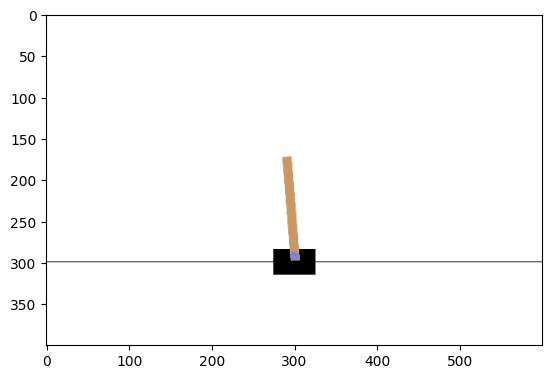

In [ ]:

# SARSA 알고리즘 매개변수
learning_rate = 0.3 ## 원래는 0.1
discount_factor = 0.99
epsilon = 0.3 ## 원래는 0.1

# 상태-액션 값 함수 초기화
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))

# 에피소드 수행
num_episodes = 10 ## 원래는 1000
episode_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    # 현재 상태에 대한 액션 선택
    action = np.argmax(q_table[state.astype(int)])

    while not done:
        # 액션 적용
        next_state, reward, done, _ = env.step(action)

        # 다음 상태에 대한 액션 선택
        next_action = np.argmax(q_table[next_state.astype(int)])

        # SARSA 업데이트
        td_target = reward + discount_factor * q_table[next_state.astype(int), next_action.astype(int)]
        td_error = td_target - q_table[state.astype(int), action]
        q_table[state.astype(int), action] += learning_rate * td_error

        state = next_state
        action = next_action
        total_reward += reward

        if np.random.rand() < epsilon:
            action = env.action_space.sample()

        plt.imshow(env.render(mode='rgb_array'))
        ipythondisplay.display(plt.gcf())
        ipythondisplay.clear_output(wait=True)

    episode_rewards.append(total_reward)

env.close()

# 에피소드별 보상 출력
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode Rewards')
plt.show()

